In [1]:
import jieba
jieba.load_userdict("食物總字典set.txt")

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\asus\AppData\Local\Temp\jieba.cache
Loading model cost 2.091 seconds.
Prefix dict has been built succesfully.


In [5]:
import jieba
import pandas as pd
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from jieba import posseg as psg
import threading
import re
from bs4 import BeautifulSoup
import urllib

In [ ]:
html_list_open = urllib.request.urlopen("http://www.mobile01.com/waypointtopiclist.php?f=202")
html_parse_list = html_list_open.read()
soup_list = BeautifulSoup(html_parse_list,"lxml")
print(soup_list)

In [ ]:
soup_list_1 = soup_list.findAll("td",{"class":"subject"})
soup_list_1 = BeautifulSoup(str(soup_list_1),"lxml")
hyper_list = []
for i in soup_list_1.findAll('a', href=True):
    list_hp =  "http://www.mobile01.com/"+i['href']
    print(list_hp)
    hyper_list.append(list_hp)

In [ ]:
len(hyper_list)

In [ ]:
import time
analysis_text = []
count = 1
for link_list in hyper_list[:2]:
    html_list_open = urllib.request.urlopen(link_list)
    html_parse_list = html_list_open.read()
    soup_list = BeautifulSoup(html_parse_list,"lxml")
    soup_list_1 = soup_list.findAll("div",{"class":"single-post"})
    for i in soup_list_1:
        analysis_text.append("".join(str(i.getText()).split("\s+")))
    
    print(count," href done... \n sleep 5 second ...")
    count +=1
    time.sleep(5)

In [ ]:
analysis_text = "".join(analysis_text)
print(analysis_text)

# 算法
基於前綴詞典實現高效的詞圖掃描，生成句子中漢字所有可能成詞情況所構成的有向無環圖(DAG) 採用了動態規劃查找最大概率路徑, 找出基於詞頻的最大切分組合對於未登錄詞，採用了基於漢字成詞能力的HMM 模型，使用了Viterbi 算法


# 分詞

jieba.cut 方法接受三個輸入參數: 需要分詞的字符串；cut_all 參數用來控制是否採用全模式；HMM 參數用來控制是否使用 HMM 模型
jieba.cut_for_search 方法接受兩個參數：需要分詞的字符串；是否使用 HMM 模型。該方法適合用於搜索引擎構建倒排索引的分詞，粒度比較細
待分詞的字符串可以是 unicode 或 UTF-8 字符串、GBK 字符串。注意：不建議直接輸入 GBK 字符串，可能無法預料地錯誤解碼成 UTF-8
jieba.cut 以及 jieba.cut_for_search 返回的結構都是一個可迭代的 generator，可以使用 for 循環來獲得分詞後得到的每一個詞語(unicode)，或者用
jieba.lcut 以及 jieba.lcut_for_search 直接返回 list
jieba.Tokenizer(dictionary=DEFAULT_DICT) 新建自定義分詞器，可用於同時使用不同詞典。 jieba.dt 為默認分詞器，所有全局分詞相關函數都是該分詞器的映射。

In [ ]:
test_drive =[]
count = 0
for i,j in psg.cut(analysis_text):
    test_drive.append(i)

print(test_drive)


In [ ]:
from string import punctuation
punctuation = punctuation +"\n"+"\t\n"+"\r\n"+" "+'。'+'。'+'！'+ '\xa0'+ '，'+ '、'+'（'+'）'+'Ｍ'
senti_word1 = []
for k,j in psg.cut(analysis_text):
    if j!="eng" and  j!="m" and k not in punctuation:
        senti_word1.append(k)
        
        
print(senti_word1)

In [ ]:
"""senti_word1=list(set(senti_word1))
print(type(senti_word1))
print(senti_word1)"""

In [ ]:
pos_corpus_file = open("Chinese_sentiment_corpus/positive_corpus.txt","r",encoding = 'utf8')
pos_corpus_read = pos_corpus_file.read()
pos_corpus_read=pos_corpus_read.split("\n")

neg_corpus_file = open("Chinese_sentiment_corpus/negative_corpus.txt","r",encoding = 'utf8')
neg_corpus_read = neg_corpus_file.read()
neg_corpus_read=neg_corpus_read.split("\n")

In [23]:
print("正向評比詞彙庫總辭數 : ",len(list(set(pos_corpus_read)))," 個詞彙")
print("負向評比詞彙庫總辭數 : ",len(list(set(neg_corpus_read)))," 個詞彙")


pos_corpus_read=list(set(pos_corpus_read))
neg_corpus_read=list(set(neg_corpus_read))

正向評比詞彙庫總辭數 :  10231  個詞彙
負向評比詞彙庫總辭數 :  12976  個詞彙


In [24]:
print("正向詞彙表前100個詞彙預覽\n")
print(pos_corpus_read[:100])
print("\n\n")
print("負向詞彙表前100個詞彙預覽\n")
print(neg_corpus_read[:100])

正向詞彙表前100個詞彙預覽

['韙', '妙年', '揖', '佳境', '突進', '拜賀', '直截了當', '長項', '拜懇', '粼', '雋永', '空靈', '受用', '從師', '瞻謁', '愉', '婚生', '容易', '九鼎', '深透', '聲名大振', '敲邊鼓', '翩然', '思想性', '園丁', '可了解', '無出其右', '喜形於色', '狂歡的', '前修', '艱苦', '把細', '意味深長的', '五彩繽紛', '有先見之明', '忠骨', '機變', '娥眉', '愜懷', '夜以繼日', '揮戈', '有判斷力的', '莫測高深', '喜劇的', '無庸', '折服', '大量', '守口如瓶', '器任', '學子', '熱中', '中聽', '嬌黃', '露頭角', '新顏', '無畏', '勻淨', '太太平平', '朝賀', '豪情滿懷', '公平正直', '基', '聲望', '欣喜', '敢於', '了不起', '嘟嘟', '很有抱負', '有條有理', '有保留地', '頒發', '安適的', '重在', '增進', '謙遜', '有吸引力', '分文不取', '風姿綽約', '明靜', '勝利', '精神', '擢升', '誇許', '知道', '抒情', '不會弄錯的', '很好', '探囊取物', '心情舒暢的', '貼邊兒', '有愛國心的', '首肯', '快快活活', '冠軍', '得道', '有進取精神', '鄭重其事', '臉紅', '斑斕', '陰翳']



負向詞彙表前100個詞彙預覽

['從重', '違誤', '迷迷糊糊', '誣賴', '內訌', '使頭暈眼花', '餓殍遍野', '盜賣', '氣死', '欠佳', '苦役', '處於支配地位', '不近情理', '令人失望的人', '揮猛烈衝打', '無力', '狂熱者', '生硬', '患..病的', '朋黨', '爛學校', '禍不單行', '拍拍屁股找不著人', '促狹', '你是怎樣', '代罪羔羊', '失節', '針刺', '喋喋不休地講話', '耗盡', '聞風喪膽', '不規則的', '楞住', '被議論', '蒙羞', '艱苦', '四大皆空', '開後門', '無遠見', '見罪', '氣盛', '

In [25]:
%matplotlib inline
positive_score =0
negative_score =0
for i in senti_word1:
    analy = jieba.cut_for_search(str(i))
    for j in analy:
        if j in pos_corpus_read:
            positive_score +=1
print("比對符合的正向評比總分positive_score = ",positive_score)


for i in senti_word1:
    analy = jieba.cut_for_search(str(i))
    for j in analy:
        if j in neg_corpus_read:
            negative_score +=1
print("比對符合的負向評比總分negative_score = ",negative_score)

比對符合的正向評比總分positive_score =  249
比對符合的負向評比總分negative_score =  104


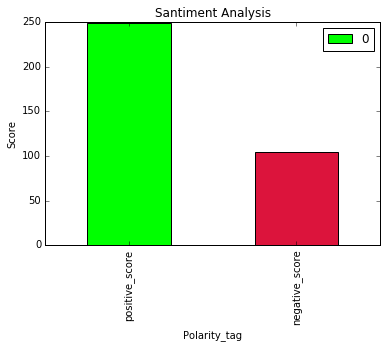

In [26]:
score_column = ["positive_score","negative_score"]
score_list = [positive_score,negative_score]
score_bar_chart = pd.DataFrame(score_list,score_column)
color=["lime","crimson"]

score_bar_chart.plot(kind="bar",linewidth=1,color=color)
plt.xlabel('Polarity_tag')
plt.ylabel('Score')
plt.title('Santiment Analysis')
plt.show()

In [27]:
food_new_set = open("食物set.txt","r")
food_new_read = food_new_set.read()
food_new_read = food_new_read.split()
print(food_new_read)

['一串心', '一串香蕉', '一些地區亦', '一價', '一價基', '一價物', '一元酚', '一元酚氧化', '一元酸', '一元醇', '一六', '一劑', '一劑量', '一包元', '一匙量', '一口', '一口粽', '一口酒', '一口香腸', '一品園道地客家菜', '一品鍋', '一品香豆乾', '一團', '一塊', '一壺量', '一大早到八九點', '一天只賣約二百個', '一天賣粒咧', '一天賣粒喔', '一天賣萬粒', '一客包裝', '一客包裝乾酪', '一客包裝起司', '一小口', '一撮茶', '一斯作物', '一杯酒', '一杯量', '一次萃取', '一次飲量', '一比加量', '一氟三氯甲烷', '一氟二氯甲烷', '一氧化二氮', '一氧化物', '一氧化碳', '一氫氯化離胺酸', '一水合物', '一湯匙量', '一滴', '一甘油酯', '一甘醇酯', '一盒顆元', '一盤量', '一硬脂二油酸甘油酯', '一硬脂二軟脂酸甘油酯', '一碗元', '一碗小羊肉', '一種中國傳統', '一種加', '一種是包肉鬆', '一種杏仁果醬餡巧克力奶油蛋糕', '一種獨特', '一窩', '一簍重量', '一籠動物', '一級反應', '一罐量', '一胺基二羧酸', '一般性技術規程', '一般酸鹼催化作用', '一般酸鹼觸媒作用', '一茶匙量', '一袋量', '一詞', '一詞也可指一種常用於三明治', '一貫作業', '一道菜', '一部分', '一酸甘油酯', '一鍋量', '一阿', '一香飲食店冬', '一魚兩吃', '一鹵化物', '丁二烯苯乙烯橡膠', '丁二胺', '丁二酸', '丁二酸二乙酯', '丁二醇', '丁基羥基甲氧苯', '丁子草屬', '丁山肉丸', '丁山肉圓', '丁烷', '丁胺酸', '丁酮', '丁酮酸', '丁酸', '丁酸丁酯', '丁酸乙酯', '丁酸價', '丁酸環已酯', '丁酸異戊酯', '丁酸發酵', '丁酸細菌', '丁酸酯', '丁酸香茅酯', '丁酸香葉草酯', '丁酸鹽', '丁醇', '丁醇丙酮發酵', '丁醇燃料', '丁醛', '丁醣', '丁醣醇', '丁醣醛酸', '丁香', '丁香樹', '丁香油', '丁香油素', '丁香莖油

In [28]:
food_dictionary = {}
for i in senti_word1:
    if i in food_new_read:
        if i in food_dictionary:
            food_dictionary[i] +=1
        else:
            food_dictionary[i] = 1

In [29]:
food_dictionary

{'上': 5,
 '下午茶': 1,
 '不同': 2,
 '中': 2,
 '串': 2,
 '之': 2,
 '也': 19,
 '保留': 1,
 '個': 3,
 '先': 3,
 '光': 2,
 '內': 3,
 '公園': 2,
 '公尺': 1,
 '其他': 2,
 '冰箱': 1,
 '冷': 1,
 '分鐘': 1,
 '剖面圖': 1,
 '功能': 1,
 '包': 1,
 '原汁': 1,
 '叉子': 1,
 '反光': 1,
 '口': 2,
 '口味': 3,
 '口感': 1,
 '可': 1,
 '台': 2,
 '台南': 4,
 '台灣': 2,
 '吃': 8,
 '同步': 2,
 '啦': 2,
 '單眼': 1,
 '圖': 1,
 '地點': 1,
 '塊': 1,
 '外表': 1,
 '大': 3,
 '大小': 1,
 '大約': 1,
 '大量': 1,
 '奧地利': 1,
 '季節': 2,
 '定點': 4,
 '對': 2,
 '小': 1,
 '層': 1,
 '工作': 1,
 '差異': 1,
 '巴西': 1,
 '度': 1,
 '張': 2,
 '愛': 3,
 '我': 23,
 '手': 1,
 '打': 1,
 '把': 1,
 '推出': 1,
 '換算': 1,
 '放': 1,
 '放大': 1,
 '數位': 1,
 '方法': 1,
 '旅': 2,
 '早餐': 1,
 '枝': 2,
 '桌': 1,
 '梗': 3,
 '條': 1,
 '棒': 1,
 '植物': 1,
 '構造': 1,
 '樹幹': 2,
 '櫃台': 2,
 '殼': 2,
 '比': 1,
 '水': 1,
 '水泥': 1,
 '泥': 2,
 '海': 1,
 '消費': 1,
 '添加': 1,
 '溫度': 1,
 '濕潤': 1,
 '焙': 3,
 '無': 3,
 '煎': 1,
 '煎茶': 1,
 '煎蛋': 1,
 '照片': 6,
 '熱': 2,
 '燒': 1,
 '牌': 2,
 '牛奶糖': 1,
 '狗': 5,
 '班': 1,
 '球': 2,
 '生態': 4,
 '痕跡': 1,
 '發炎': 1,
 '盒': 1,
 '破壞': 1,
 '空間'

In [30]:
pd_food_dictionary = pd.DataFrame(list(food_dictionary.items()),columns=['word','count'])
pd_food_dictionary

,word,count
0,包,1
1,大約,1
2,綠,5
3,啦,2
4,茶,1
5,分鐘,1
6,消費,1
7,地點,1
8,把,1
9,冷,1


In [31]:
a = pd_food_dictionary['word']
b= pd_food_dictionary['count']


In [32]:
a

0        包
1       大約
2        綠
3        啦
4        茶
5       分鐘
6       消費
7       地點
8        把
9        冷
10       煎
11     野櫻莓
12      台灣
13       大
14      發炎
15       層
16       繩
17       海
18       豬
19       可
20       頭
21       也
22       桌
23      類名
24      原汁
25      溫度
26       度
27       蔥
28      照片
29       手
      ... 
135     魚塭
136    章魚燒
137     換算
138     保留
139      魚
140     同步
141     構造
142      上
143     限定
144      牌
145     推出
146     反光
147    奧地利
148      面
149     放大
150    下午茶
151     功能
152      球
153      表
154      吃
155     煎蛋
156     過程
157     蘋果
158     飲料
159      光
160     水泥
161      莓
162     耐性
163     方法
164      棒
Name: word, dtype: object

In [33]:
b

0       1
1       1
2       5
3       2
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      2
12      2
13      3
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21     19
22      1
23      1
24      1
25      1
26      1
27      2
28      6
29      1
       ..
135     1
136     1
137     1
138     1
139     5
140     2
141     1
142     5
143     2
144     2
145     1
146     1
147     1
148     1
149     1
150     1
151     1
152     2
153     1
154     8
155     1
156     1
157     2
158     1
159     2
160     1
161     2
162     1
163     1
164     1
Name: count, dtype: int64

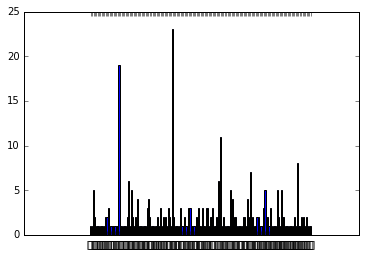

In [34]:

plt.bar(range(len(food_dictionary)), food_dictionary.values(), align='center')
plt.xticks(range(len(food_dictionary)), food_dictionary.keys())

plt.show()

In [35]:
import jieba

In [36]:
tai_web_list_file = open("台南小吃網址.txt","r")
tai_web_list_read = tai_web_list_file.read()
print(type(tai_web_list_read))
print(tai_web_list_read)

<class 'str'>
https://zh.wikipedia.org/wiki/%E9%A3%9F%E7%89%A9
https://zh.wikipedia.org/wiki/%E9%BB%9E%E5%BF%83_(%E6%B6%88%E6%AD%A7%E7%BE%A9)
https://zh.wikipedia.org/wiki/%E5%B0%8F%E5%90%83
https://zh.wikipedia.org/wiki/%E4%B8%AD%E5%BC%8F%E5%B0%8F%E5%90%83
https://zh.wikipedia.org/wiki/%E9%A6%99%E6%B8%AF%E8%A1%97%E9%A0%AD%E5%B0%8F%E5%90%83
https://zh.wikipedia.org/wiki/%E5%8F%B0%E7%81%A3%E5%B0%8F%E5%90%83
https://zh.wikipedia.org/wiki/%E5%8F%B0%E7%81%A3%E5%B0%8F%E5%90%83
https://zh.wikipedia.org/wiki/%E5%8F%B0%E7%81%A3%E5%B0%8F%E5%90%83
https://zh.wikipedia.org/wiki/%E5%8F%B0%E7%81%A3%E8%8F%9C
https://zh.wikipedia.org/wiki/%E6%AD%A5%E8%A1%8C%E8%A1%97
https://zh.wikipedia.org/wiki/%E5%A4%96%E8%B3%A3%E5%BA%97
https://zh.wikipedia.org/wiki/%E5%BF%AB%E9%A4%90
https://zh.wikipedia.org/wiki/%E9%9B%B6%E9%A3%9F
https://zh.wikipedia.org/wiki/%E9%9B%B6%E9%A3%9F
https://zh.wikipedia.org/wiki/%E9%9B%B6%E9%A3%9F
https://zh.wikipedia.org/wiki/%E9%BB%9E%E5%BF%83_(%E6%B6%88%E6%AD%A7%E7%BE%A9)
https:/

In [37]:
tai_web_list = tai_web_list_read.split("\n")
for i in tai_web_list:
    print(i)

https://zh.wikipedia.org/wiki/%E9%A3%9F%E7%89%A9
https://zh.wikipedia.org/wiki/%E9%BB%9E%E5%BF%83_(%E6%B6%88%E6%AD%A7%E7%BE%A9)
https://zh.wikipedia.org/wiki/%E5%B0%8F%E5%90%83
https://zh.wikipedia.org/wiki/%E4%B8%AD%E5%BC%8F%E5%B0%8F%E5%90%83
https://zh.wikipedia.org/wiki/%E9%A6%99%E6%B8%AF%E8%A1%97%E9%A0%AD%E5%B0%8F%E5%90%83
https://zh.wikipedia.org/wiki/%E5%8F%B0%E7%81%A3%E5%B0%8F%E5%90%83
https://zh.wikipedia.org/wiki/%E5%8F%B0%E7%81%A3%E5%B0%8F%E5%90%83
https://zh.wikipedia.org/wiki/%E5%8F%B0%E7%81%A3%E5%B0%8F%E5%90%83
https://zh.wikipedia.org/wiki/%E5%8F%B0%E7%81%A3%E8%8F%9C
https://zh.wikipedia.org/wiki/%E6%AD%A5%E8%A1%8C%E8%A1%97
https://zh.wikipedia.org/wiki/%E5%A4%96%E8%B3%A3%E5%BA%97
https://zh.wikipedia.org/wiki/%E5%BF%AB%E9%A4%90
https://zh.wikipedia.org/wiki/%E9%9B%B6%E9%A3%9F
https://zh.wikipedia.org/wiki/%E9%9B%B6%E9%A3%9F
https://zh.wikipedia.org/wiki/%E9%9B%B6%E9%A3%9F
https://zh.wikipedia.org/wiki/%E9%BB%9E%E5%BF%83_(%E6%B6%88%E6%AD%A7%E7%BE%A9)
https://zh.wikipedia.

In [38]:
food_context = ""
for list_i in tai_web_list:
    try:
        html_list_open = urllib.request.urlopen(list_i)
        html_parse_list = html_list_open.read()
        soup_list = BeautifulSoup(html_parse_list,"lxml")
        food_context += str(soup_list.getText())
    except ValueError:
        pass
    continue

In [39]:
from hanziconv import HanziConv
import string

alphabet_set = string.ascii_letters+string.punctuation+" "+"-"+"…"
food_context_spl = food_context.lower().split(r'\W')
food_context_spl = HanziConv.toTraditional(str(food_context_spl))
food_context_spl = "".join([c for c in food_context_spl if c not in alphabet_set])
print(food_context_spl)

食物維基百科，自由的百科全書120食物食物398376343983763410535帶有失效鏈接的條目含有法語的條目包含規範控製信息的維基百科條目食品1月2月3月4月5月6月7月8月9月10月11月12月1月2月3月4月5月6月7月8月9月10月11月12月食物105352262中文02020950食物維基百科，自由的百科全書跳轉至：導航、搜索世界各國每天食物消耗的熱量（卡路裏）人類飲食的生物能中國菜中的炒飯和炒麵鹹甜粿食物通常以碳水化合物、脂肪、蛋白質或水構成，能夠藉由進食或是飲用為人類或者生物提供營養1或愉悅的物質。食物的來源可以是植物、動物或者其他界的生物，例如真菌，亦或發酵產品像是酒精。生物攝取食物後，被生物的細胞同化，提供能量，維持生命及刺激成長。在歷史上，人類主要是透過狩獵採集者及耕種兩種方式獲得食物，其餘的還有畜牧、釣魚等。現在日益增加的世界人口中，大部份需要的食物熱量是由食品產業提供。經過烹調後的食物被稱為菜餚（粵語稱為餸、餸菜，潮語稱為鹹、鹹酸），許多的文化通常都有各式各樣獨特的菜餚、烹飪偏好或方式，而研究文化和食物間關係的學問被稱為美食學。這也促進了文化間藉由進行食物間複雜的貿易進行經濟交流，而不隻是消費。人類是雜食性動物，食物的消費會受到地域或是社會結構─例如價值觀─的影響。有許多研究分析進食的習慣，還有每年奪走許多性命的食源性疾病。食物也通常被用來隱喻許多事物。有許多機構在監控食品衛生及食品安全，包括國際食品保護協會（英語：）、世界資源研究所（英語：）、世界糧食計劃署、聯合國糧食及農業組織及國際食品信息理事會（英語：）。他們關注的議題包括可持續性、生物多樣性、氣候變化、營養人類學（英語：）、人口自然增長率、供水及食品安全。食物權（英語：）是經濟、社會及文化權利國際公約（）提出的人權之一，認可「有適當生活水平的權利，包括適當的食物」也就是「免於飢餓的自由。」目錄1食物來源11植物12動物2生產3製備31動物屠宰32烹飪321烹飪方法322生食33餐館4食物和味覺41甜42酸43鹹44苦45鮮5食物分類6參考文獻61引用62書籍7外部鏈接8參見食物來源編輯大部分的食物通常來自植物或是動物，儘管有些例外，例如食用菌。環境周遭的細菌或是酵母也被用來發酵或醃漬食品，像是麵包、酒、乳酪、優格。有些文化也會食用海苔、原生生物、或者藍菌類的例如螺旋藻。2鹽常

In [40]:
import jieba.posseg as pseg

words = pseg.cut(food_context_spl)
food_context_spl =""
for j,k in words:
    if k !='x' and  k !='m':
        food_context_spl +=j

print("done...")

done...


In [41]:
seg_list_wiki = jieba.cut_for_search(food_context_spl)  # 搜索引擎模式
seg_list_wiki =  ",".join(seg_list_wiki)
seg_list_wiki = seg_list_wiki.split(",")
seg_list_wiki = list(set(seg_list_wiki))
print(seg_list_wiki)

['絲', '高法', '蜜汁', '情人', '三芝', '氣氛', '證碼', '修塔莎得徠', '晶英軒', '酸甜', '容易', '市中心', '聯', '雙人餐', '路口', '客報', '如內', '天鍋', '麻豆', '賣光', '十日', '區也', '哇', '旅遊邦', '小販以', '大量', '喀比', '發拉仔', '控肉飯', '類對', '宮有', '驅除', '洗澡', '譯作義式', '栗子', '金澤', '鋤頭', '北關', '香料', '基', '閱讀午', '學名', '容器', '我家', '夜市', '速查', '老兵', '痞客', '說會給', '光行', '刺激', '態度則', '週誌', '安安', '菜門口', '介', '精神', '校園裡', '知道', '必須', '外地人', '禁止', '豬心穎川', '南紡夢', '出自', '綿綿冰', '時候', '土司', '蟋蟀', '臉還', '七天', '洞驚為', '尚', '廣', '喇叭', '奶類', '以下', '工具', '海港', '按照', '搭球', '卡杯', '橘子', '設置', '拉', '珠', '而僅', '記憶', '這邊', '窗外', '還有', '幫小環', '這位', '各類', '有序', '過來', '醫療', '下性', '魚類', '類似', '休王氏', '南京路', '可靠', '過聖誕', '骨', '認為', '南京', '荔枝', '台下', '漁港', '清治', '香港', '文件', '青泥', '受', '六', '宅配', '桃竹苗', '聖', '食用', '蜜蜂', '小異', '茶匙', '林口', '篤', '練馬師', '以', '脆感', '旅店', '可文', '失效', '聿', '漏掉', '茴餅', '阿明', '經開', '差', '亦', '川菜', '大白', '客邦', '家裡', '大概', '價差', '中小', '新條', '火城', '醬味化', '茶食', '拜縣', '散散', '情熱', '魯味', '杯卡', '榮大學', '清邁', '早味', '機場', '聯名', '過往', '地人', '腸', '被子', '名錄', '排到

In [42]:
food_list_open = open("台南美食字典.txt","r")
food_list_read = food_list_open.read()
print(food_list_read)

李鵠餅店
綠豆沙
咖哩餅
蛋黃酥
基隆仁三
鳳梨酥
暖暖小館
基隆暖暖街
咖哩麵冬
咖哩麵可加油豆腐
基隆七堵區開元
民德一口
開元停車場對面
咖哩炒麵
基隆義二二巷
紀家原汁豬腳
基隆愛四
之
奶油螃蟹
基隆愛四夜內
大腸頭
基隆孝二
巷內
阿芬飯店
基隆中船
辦桌菜嘎小點心
花素蒸餃牛肉餡餅
基隆暖暖街
東勢口
枸杞醉雞韭黃臘肉絲
五更腸旺
砂鍋魚頭
孝三大腸頭
大腸頭豬內臟
基隆孝三
巷內
邊攤
硬管豬心
基隆大白鯊魚丸
基隆仁一
全家福元宵
基隆愛四
之
西六碼頭肉圓
基隆中山二
三沙灣米苔目
基隆中船大程仔場口
喜如意海鮮
基隆復興
刁家小館
山東燒雞去骨盤裝
山東燒
豬腳切片盤裝
山東炒碼麵紅卻不辣
敦化南一段巷
忠孝四段與民大道四段間
中心診所
山東炒碼麵用的是韓國辣椒粉喔
員林大粒肉圓冬
大粒肉圓元
板橋府中
福德街口
近億泰機車行
虱目魚丸湯
港味鮮粵菜館
枝竹羊腩煲
蒜香南乳排骨
一魚兩吃
魚肉切片炒芹菜
四維
要吃特別的可提早一二天預訂
酥炸魚骨
甲魚跟鰻魚的料理
網友反應
好吃便宜又大碗
阿瑞官糕粿
百年
油飯
芋粿蹺
內包餡
發粿
甜粿
紅龜粿
菜頭粿
花生粿
新莊新莊新莊老街上
廣福宮
無店面
要先打電話下訂單
芋粿蹺用
大湖檳榔芋頭
麻油雞
麻油雞
麻油雞腿限量
超嫩
乾湯麻油麵線
湯的加湯免錢
板橋南雅東南雅夜內
南雅南口
有設外帶區
要排隊啦
政江湯圓
招牌酒釀湯圓
豐胸養顏
招牌鹹湯圓
紅豆湯圓
花生湯圓
金山南二段樓
金華街口
招牌花生芝麻
湯圓常缺貨
金檳滷味冬
多種滷味章魚
雞翅
雞胗肝
鴨翅
鴨蛋
舌頭
叉燒
豬腳
仁愛四段
敦化南一段與大安一段間
靠大安一段口
每天四五點左右很多人喔
招牌醉雞腿牛腱
鹹水雞
翁裕美麥芽糖百年
可零售給家庭用
或批發給食品業
新莊新莊
登龍街口
紅麥芽糖有止咳及補血功效
可加於食物裡或夾餅乾來使用
分紅及白麥芽糖
佳佳可麗餅
可麗餅
板橋裕民街新海橋下去右轉儐儀館
紅糟肉圓冬
福州魚丸湯金牌獎
正義北
巷旁
雙圓口
紅糟肉圓
風虱丸湯
三六粿店
冬艾草菜包
包蘿蔔絲
新西三水街
龍山國中旁
捷運龍山寺
紅龜粿
蜜汁芋頭冬
蜜汁芋頭元熱麻糬
配花生粉
米糕粥
可配花生粉喔
廣州街
西園一段口
龍山寺公園旁
捷運龍山寺旁
紅豆湯
花生仁湯可配油條
使用甲仙芋頭
佳佳可麗餅
可麗餅
板橋裕民街新

In [43]:
seg_list = jieba.cut_for_search(food_list_read)  # 搜索引擎模式
seg_list =  " ".join(seg_list)
seg_list = seg_list.split()
#seg_list = list(set(seg_list))
all_dict_list = seg_list+food_list_read.split()+seg_list_wiki
all_dict_list=list(set(all_dict_list))
print(all_dict_list)

['脫線休閒牧場', '絲', '高法', '蜜汁', '情人', '三芝', '氣氛', '證碼', '薔薇派', '綜合魚羹六種料', '修塔莎得徠', '晶英軒', '台中清水鎮鰲峰', '酸甜', '靠獅潭', '七賢三口', '玉珍', '容易', '鳳吞魚翅盅招牌', '有網友反應讚喔', '酸梅湯喝完味道仍在', '庄腳菜', '市中心', '聯', '雙人餐', '九層油蔥粿百年第四代', '路口', '客報', '火雞', '如內', '雪花', '豆腐肉', '天鍋', '麻豆', '賣光', '十日', '區也', '純精', '哇', '旅遊邦', '中華三口', '小販以', '大量', '喀比', '發拉仔', '控肉飯', '類對', '宮有', '驅除', '洗澡', '栗子', '譯作義式', '芋頭酥', '金澤', '鋤頭', '北關', '澎湖馬公文康街', '香料', '基', '益成手工麵線冬', '德里', '閱讀午', '學名', '郭泰昌', '屏東東港鎮東隆國小旁', '我家', '容器', '夜市', '速查', '老兵', '痞客', '說會給', '光行', '刺激', '態度則', '週誌', '含蚵仔及大腸', '信義四段巷', '安安', '雞肝', '花蓮火車站旁', '菜門口', '介', '勝利', '喜來香刀削麵', '精神', '蒸包', '校園裡', '知道', '必須', '台中豐原信義街', '很好', '外地人', '彰化員林鎮光明街民權街口', '禁止', '豬心穎川', '南紡夢', '下午點多', '出自', '台南後壁鄉後壁村', '士林夜', '綿綿冰', '時候', '土司', '蟋蟀', '臉還', '羊肉湯', '七天', '洞驚為', '中興', '尚', '廣', '正義北上', '喇叭', '奶類', '以下', '南京東段巷', '工具', '海港', '四十', '歸綏街', '舊莊街段', '按照', '搭球', '橘子', '卡杯', '設置', '大巷', '但靠近大順口', '拉', '黑豆干', '珠', '而僅', '記憶', '這邊', '窗外', '還有', '高雄三民街', '幫小環', '這位', '各類', '有序', '過來', '醫療

In [44]:
food_dictionary = {}
for i in senti_word1:
    if i in all_dict_list:
        if i in food_dictionary:
            food_dictionary[i] +=1
        else:
            food_dictionary[i] = 1
            

In [45]:
food_dictionary

{'「': 1,
 '」': 1,
 '一定': 3,
 '一直': 2,
 '一般': 1,
 '上': 5,
 '上班': 1,
 '下': 3,
 '下來': 1,
 '下午': 3,
 '下午茶': 1,
 '下去': 3,
 '不': 2,
 '不到': 2,
 '不同': 2,
 '不多': 1,
 '不太': 1,
 '不好': 1,
 '不少': 2,
 '不怕': 1,
 '不想': 1,
 '不是': 4,
 '不然': 5,
 '不用': 1,
 '不能': 1,
 '不膩': 2,
 '不要': 2,
 '不過': 5,
 '不錯': 1,
 '並': 3,
 '中': 2,
 '中午': 1,
 '中間': 1,
 '之': 2,
 '之前': 1,
 '之類': 2,
 '也': 19,
 '乾': 1,
 '了': 15,
 '些': 1,
 '交通': 1,
 '享受': 1,
 '亮': 1,
 '人': 6,
 '人士': 1,
 '人家': 1,
 '人氣': 2,
 '人潮': 1,
 '什麼': 6,
 '今年': 1,
 '介紹': 1,
 '他們': 1,
 '代用': 1,
 '以': 1,
 '以上': 3,
 '以前': 2,
 '但': 11,
 '但是': 1,
 '你': 6,
 '使用': 3,
 '來': 5,
 '個': 3,
 '假日': 1,
 '偏': 2,
 '做成': 1,
 '停下': 1,
 '像': 1,
 '先': 3,
 '光': 2,
 '內': 3,
 '內外': 1,
 '內用': 1,
 '公': 2,
 '公園': 2,
 '其他': 2,
 '其實': 2,
 '再': 1,
 '出': 1,
 '分享': 2,
 '分別': 1,
 '分鐘': 1,
 '別': 2,
 '到': 8,
 '前': 2,
 '功能': 1,
 '動物': 2,
 '包': 1,
 '卻': 1,
 '原來': 1,
 '原圖': 1,
 '原汁': 1,
 '去': 7,
 '參觀': 1,
 '又': 6,
 '及': 2,
 '口': 2,
 '口味': 3,
 '口感': 1,
 '古道': 1,
 '另外': 1,
 '只有': 5,
 '叫': 1,
 '可': 1,
 '可以

In [46]:
import pandas as pd

train_data_df = pd.read_csv("D:\\Google 雲端硬碟\\000-PYTHON程式區\\labeled_NTUSD_simplified.csv", header=None, delimiter=",",error_bad_lines=False)
train_data_df.columns = ["Sentiment","Text"]

test_data = pd.DataFrame(df.context_review)
test_data.columns = ["context_review"]

NameError: name 'df' is not defined

In [ ]:
print(train_data_df.shape)
print(test_data.shape)

In [ ]:
train_data_df.head()

In [ ]:
test_data.head()

In [ ]:
print(train_data_df.Sentiment.value_counts())

In [ ]:
train_data_df_text = train_data_df.Text.tolist()
train_data_df_senti_token = train_data_df.Sentiment.tolist()

In [ ]:
print(train_data_df_text)

In [ ]:
print(train_data_df_senti_token)

In [ ]:
counter = 0
for i in train_data_df_text:
    try:
        b = ",".join(jieba.cut_for_search(i))
        print(train_data_df_text[counter]," replace with ",b)
        train_data_df_text[counter] = str(b)
        counter += 1
    except AttributeError:
        train_data_df_text[counter] = ""
        counter += 1
    continue
    
    

In [ ]:
len(train_data_df_text)

In [ ]:
print(train_data_df_text)

In [ ]:
len(train_data_df_senti_token)

In [ ]:
d = {"Sentiment": train_data_df_senti_token, "Text": train_data_df_text}
new_ML_data_frame = pd.DataFrame(data=d)


In [ ]:
new_ML_data_frame

In [ ]:
new_ML_data_frame.Sentiment.value_counts()

In [ ]:
import numpy as np 

print(np.mean([len(s.split(",")) for s in new_ML_data_frame.Text]))

In [ ]:
test_data = test_data.context_review.tolist()

In [ ]:
index_test = 0
for i in test_data:
    for j in str(i).split("\s"):
        j = ''.join(ch for ch in j if ch not in punctuation)
        test_data[index_test] = j
        index_test +=1
        print(j)
        print("\n")
        


In [ ]:
counter = 0
for i in test_data:
    try:
        b = ",".join(jieba.cut_for_search(i))
        print(test_data[counter],"\nreplace with\n ",b)
        print("\n\n")
        test_data[counter] = str(b)
        counter += 1
    except AttributeError:
        test_data[counter] = ""
        counter += 1
    continue

In [ ]:
d = {"Text": test_data}
test_data_df = pd.DataFrame(data=d)

In [ ]:
test_data_df

In [ ]:
import re, nltk
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def tokenize(text):
    return text.split(",")
    
vectorizer = CountVectorizer(analyzer="word",tokenizer = tokenize)

In [ ]:
corpus_data_features = vectorizer.fit_transform(new_ML_data_frame.Text.tolist() + test_data_df.Text.tolist())

In [ ]:
corpus_data_features_nd = corpus_data_features.toarray()
corpus_data_features_nd.shape

In [ ]:
vocab = vectorizer.get_feature_names()
print(vocab)

In [ ]:
# Sum up the counts of each vocabulary word
dist = np.sum(corpus_data_features_nd, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print(count," : ", tag)

In [ ]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
    corpus_data_features_nd[0:len(new_ML_data_frame)], 
    new_ML_data_frame.Sentiment,
    train_size=0.85, 
    random_state=1234)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model = log_model.fit(X=X_train, y=y_train)

In [ ]:
y_pred = log_model.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
log_model = LogisticRegression()
log_model = log_model.fit(X=corpus_data_features_nd[0:len(new_ML_data_frame)], y=new_ML_data_frame.Sentiment)
test_pred = log_model.predict(corpus_data_features_nd[len(new_ML_data_frame):])
import random
spl = random.sample(range(len(test_pred)), len(test_pred))
for text, sentiment in zip(test_data_df.Text[spl], test_pred[spl]):
    print(sentiment,"  ","".join(list(text.split(","))[:20]))

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
NV_model = clf.fit(X=corpus_data_features_nd[0:len(new_ML_data_frame)], y=new_ML_data_frame.Sentiment)
test_pred = NV_model.predict(corpus_data_features_nd[len(new_ML_data_frame):])
import random
spl = random.sample(range(len(test_pred)), len(test_pred))
for text, sentiment in zip(test_data_df.Text[spl], test_pred[spl]):
    print(sentiment,"  ", "".join(list(text.split(","))[:20]))

In [ ]:
import jieba.analyse

In [ ]:
document = """股票[編輯]
維基百科，自由的百科全書
金融市場
Philippine-stock-market-board.jpg
股票市場顯示▼
債券市場顯示▼
外匯市場顯示▼
金融衍生品市場顯示▼
其他市場顯示▼
估價和理論顯示▼
金融系列顯示▼
閱 論 編

孟買電力公司的股票

香港證券交易所

納斯達克行情牆
股票（英語：stock share）是一種有價證券，是股份公司為籌集資金發給投資者作為公司資本部分所有權的憑證，成為股東以此獲得股息（股利），並分享公司成長或交易市場波動帶來的利潤；但也要共同承擔公司運作錯誤所帶來的風險。
目錄  [隱藏] 
1	歷史
2	股票的分類
2.1	台灣
2.2	中國
2.3	香港
2.4	國際
3	股票交易
3.1	委託方式
3.2	交易費用
3.3	競價方式
4	投資方法
4.1	被動投資
4.2	價值投資
4.3	趨勢投資
5	投資組合
6	股市泡沫
7	技術分析
8	常見股票術語
9	常見股票指數
9.1	中國
9.2	臺灣
9.3	香港
9.4	美國
9.5	日本
9.6	英國
9.7	歐洲
9.8	國際
10	證券交易所
11	參考
12	相關條目
歷史[編輯]
股票制度，起源於1602年的荷蘭東印度公司。當時該公司經營航海事業。它在每次出海前向人集資，航程完成後即將各人的出資以及該航次的利潤交還給出資者。1613年起該公司改為四航次，才派一次利潤。這就是「股東」和「派息」的前身。
股票的分類[編輯]
台灣[編輯]
按股東權利，可分為普通股、特別股。
按股票狀況，可分為普通股、全額交割股。
按交易方式，可分為上市股票（集中市場交易）、上櫃股票（櫃檯買賣交易）、興櫃股票（即將上市上櫃股票）、未上市上櫃股票。
中國[編輯]
按票面形式，可分為記名股票、無記名股票和有面額股票。
按上市交易所和買賣主體，可分為A股（上海和深圳）、B股（上海和深圳，其中上海B股以美元結算，深圳B股以港元結算）、H股（香港聯交所上市交易的在大陸運作的公司）、紅籌股（在香港或境外登記註冊，但實際經營活動在中國大陸的公司）。
按持股主體，在2005-2006年的股權分置改革以前，可分為國家股，法人股和個人股。
按公司業績，可分為績優股和垃圾股。
按股東權利，分為優先股和普通股。
按流通狀況，分為流通股和非流通股。
香港[編輯]
更多資料：B股#香港
基於「同股同權」的公平原則，香港自1987年起禁止上市公司發行B股。已發行B股的公司則可以繼續營運。
現時，太古股份有限公司是香港唯一的AB股。兩者投票權相等，但B股的面值及所佔權益只是A股的五分一。
國際[編輯]
按權利及分紅情況，可分為優先股、普通股（A股）、B股。
股票交易[編輯]
委託方式[編輯]
股票交易委託可分為以下幾種：
填單委託
交易者通過填寫並遞交交易單委託轉移股份所有權。
電話委託
交易者通過電話委託仲介轉移股份所有權。
委託機委託
交易者通過特殊的交易所接入設備委託轉移股份所有權。
網上委託
網際網路產生後，通過股票軟體委託中介機構對股份所有權進行轉移。
交易費用[編輯]
託管費
佣金
印花稅（交易稅）
過戶費（手續費）
轉託管費
競價方式[編輯]
逐筆交易
集合競價
連續競價
投資方法[編輯]
被動投資[編輯]
被動投資的理論基礎是建立在有效市場假說基礎上的隨機漫步理論，相對於價值投資或者趨勢投資，更大程度上表現出「由市場的不斷發展獲利」。主要表現形式為投資指數基金。
價值投資[編輯]
主條目：價值投資
價值投資是力求從宏觀經濟、行業和具體企業的基本面分析企業的內在價值，並以此指導投資的投資方法。其中因傾向不同，又可分為價值投資和成長性投資：
價值投資：更傾向於注重投資的安全邊際，往往是投資於低市盈率、低市淨率的股票。
成長性投資：更傾向於注重目標企業的利潤成長性和可持續性，往往是投資於高市盈率、高市淨率的股票。
這兩種投資方法都是以對企業進行資產估值為前提，相對於目前企業價值而言，過低的股價和良好的盈利成長性都是企業投資價值的一部分，成長性可以通過對企業未來的自由現金流量折現來資料化。由於對企業具體的成長性判斷準確十分困難，在投資的時候，成長性投資者有必要以一定的安全邊際來降低投資風險；價值投資者也必須兼顧企業未來的發展趨勢，否則企業價值有可能隨著時間的推移逐步縮小，使投資虧損，畢竟以清盤目標公司為手段的價值投資並不多見，所以兩者並不矛盾。
著名的價值投資人有彼得·林奇，沃倫·巴菲特等。
趨勢投資[編輯]
參見：限時限額加碼停利投資法
趨勢投資是指通過對買賣雙方力量的分析，技術分析等方法研究股票趨勢，波段操作，不以企業的基本面做決策依據或主要依據的投資方法。由於其投機性質較明顯，又有人稱為「投機」。
由於總是有過多的人進行短期的投機交易，致使短期投機交易往往無利可圖，再考慮到因頻繁買賣而產生的相對高昂的交易費用，使短期投機交易對多數人來講風險比長期持有的價值投資要大。
投資組合[編輯]
主條目：投資組合
投資組合即買入不同股票所組成的集合。在股票市場中能平滑收益和虧損的幅度，有效的降低股票投資的非系統性風險。其原則是在兼顧盈利性的前提下，儘量把不同種類的股票納入組合，比如不同行業，不同規模，不同國家的股票。
根據《當代投資組合理論和投資分析》（Modern Portfolio Theory and Investment Analysis）中的記述，持有單只股票時價格的標準差（波動幅度）是市場總體價格波動幅度的49.2%，持有20隻股票組成的投資組合，其標準差為19.2%，而1000隻股票組成的投資組合比20隻股票的投資組合風險僅下降0.8%。所以20隻股票是組成投資組合最佳的持股數量。
股市泡沫[編輯]

圖為1990年代在深圳，人們瘋狂搶購股票的情景。這次事件使當時的深圳市發生動盪，並引發中華人民共和國建國以來的第一次股災。

金融海嘯道瓊斯工業平均指數一度無量下跌
股市泡沫（bubble）指股票交易市場中的股票價格超過其內在的投資價值的現象。一般來說，在股票交易市場上的股票泡沫是一直存在的。現在一般所指的股市泡沫，是指股市中的股票價格過度其內在的投資價值的現象。表現為一個連續過程中，股價急劇上升，其上升使人產生價格將進一步上升的預期，並由此而吸引來大量的以僅以買賣價差為獲利手段的投資者，最終使股票價格大幅度脫離其淨值。泡沫的大小並無絕對參考方式，歷史上所有的股市泡沫都是事後才被確認的，股市進入泡沫階段並不意味著它馬上就會下跌或者暴跌，而是意味著此時投資於股市風險更大而回報率更小。
股市泡沫的確定：
市盈率（PE）法：而15倍市盈率是一個全球成熟市場的均值，全球大型市場2007年的市盈率罕有地超過20倍的。世界大部分股市在牛市見頂時市盈率都在60倍左右。
儲蓄收益率比較法：以上市公司總的投資的回報率（淨利潤與市值之比）與一年存款淨收益相比，如果有風險的股票投資收益低於無風險的銀行存款（或國債）收益率，則說明市場已進入泡沫階段。
總市值占GDP比重法：在美國股市的最近100年中，這個指標最低為0.4，最高為1.6。高點曾經出現過兩次，第一次是在上世紀30年代「大蕭條」之前，另一次發生在1999年。臺灣股市見頂時該指標為1.55，跌到底時為0.48。
托賓Q法：以Q值反映當時的投資需求和投資成本。當Q值>1時，新投入的投資成本會較低，從而增加投資需求。當Q<1時，因為市場價格少於資產的內含價值，所以購買現有資產的成本會較高，投資需求會減少。
技術分析[編輯]
主條目：技術分析
K線
移動平均線
技術指標
技術圖表
相對強弱指數
艾略特波浪理論
道鐘斯理論
布曆加通道
阻力位與支持位（壓力線和支撐線）
常見股票術語[編輯]
開盤價、收盤價、最高價、最低價、壓力線、支撐線、K線、美國線、牛市、熊市、多頭、空頭、除息、除權、買空、賣空
常見股票指數[編輯]
中國[編輯]
上證股價指數
深圳股價指數
滬深300指數
創業版
臺灣[編輯]
加權股價指數
香港[編輯]
恒生指數
國企指數
美國[編輯]
道瓊斯工業平均指數
納斯達克100指數
標準普爾500指數
日本[編輯]
日經平均指數
英國[編輯]
富時100指數
歐洲[編輯]
泛歐績優股指數
國際[編輯]
MSCI國際指數
證券交易所[編輯]
中華人民共和國上海證券交易所
中華人民共和國深圳證券交易所
香港香港交易所（HKEx）
香港香港創業板（GEM）
臺灣臺灣證券交易所（TWSE）
臺灣臺灣股票櫃檯買賣市場（OTC）
日本東京證券交易所（TSE）
日本日本股票自動報價市場（JASDAQ）
大韓民國韓國證券交易所
新加坡新加坡交易所（SGX）
新加坡新加坡股票自動報價市場（SESDAQ）
印度尼西亞雅加達證券交易所
馬來西亞吉隆玻證券交易所（KLSE）
俄羅斯莫斯科證券交易所
澳大利亞澳大利亞證券交易所
紐西蘭紐西蘭證券交易所
美國紐約證券交易所（NYSE）
美國納斯達克（NASDAQ）
美國美國OTCBB證券市場
加拿大多倫多證券交易所（TSX）
加拿大加拿大創業板（CDNX）
加拿大溫哥華股票交易所（VSE）
歐洲聯盟歐州新市場（EUROnext）
歐洲聯盟歐盟股票自動報價市場（EASDAQ）
英國英國倫敦股票交易所技術板市場（techMark）
法國巴黎證券交易所
義大利義大利證券交易所
德國德意志交易所集團
瑞典斯德哥爾摩證券交易所
冰島冰島證券交易所
巴西里約熱內盧證券交易所
百慕達百慕達證券交易所（BSX）
股票市場[編輯]
維基百科，自由的百科全書
Confusion grey.svg提示：本條目的主題不是證券市場、集中市場或店頭市場。
金融市場
Philippine-stock-market-board.jpg
股票市場顯示▼
債券市場顯示▼
外匯市場顯示▼
金融衍生品市場顯示▼
其他市場顯示▼
估價和理論顯示▼
金融系列顯示▼
閱 論 編
股票市場（Stock Market）指股票發行、買賣、交易的市場。
目錄  [隱藏] 
1	歷史
2	功能
2.1	積聚資本
2.2	轉讓資本
2.3	轉化資本
3	分類
3.1	集中市場
3.2	店頭市場
4	分析方法
4.1	技術分析
4.2	基本分析
4.3	演化分析
5	文化
6	參見
7	注釋
8	外部連結
歷史[編輯]
1602年，荷蘭人開始在阿姆斯特河橋上買賣荷屬東印度公司股票[1]，這是全世界第一支公開交易的股票，而阿姆斯特河大橋則是世界最早的股票交易所。在那裏擠滿了等著與股票經紀人交易的投資人，甚至需要警察來維持秩序。
1773年，英國的第一家證券交易所在倫敦的喬納森咖啡館成立，1802年，該證券交易所獲得英國政府的正式批准，該證券交易所後來發展成了現在的倫敦證券交易所。

2007年東京證交所上市公司總值超過四兆美金

美國的紐約證交所
1790年，美國成立了自己的第一家證券交易所——費城證券交易所。1792年5月17日，24個證券經紀人在紐約華爾街68號外一棵梧桐樹下簽署了《梧桐樹協議》，1817年3月8日這個組織起草了一項章程，並把名字更改為紐約證券交易委員會，1863年改為紐約證券交易所。
20世紀20年代末至30年代，經濟大蕭條爆發，全世界的股票市場呈現萎靡不振的狀態，第二次世界大戰結束至20世紀60年代，全世界的股票市場開始了復甦階段，從20世紀70年代至今，全世界的股票市場出現高度繁榮的局面，不僅股票市場的規模大為擴大，股票交易的次數也日趨活躍。
功能[編輯]
積聚資本[編輯]
通過發行股票，資本從投資者手中流入上市公司。
轉讓資本[編輯]
股票市場為股票的流通提供了場所。
轉化資本[編輯]
股票市場使非資本的貨幣資金轉化為了生產資本。
分類[編輯]
集中市場[編輯]
集中市場（英語：Stock Exchange Market）是指上市股票在證券交易所以集中公開競價方式進行交易的方式，集中市場的交易商品均為標準化，而競價的方式則有電腦自動撮合與人工撮合兩種，例如台灣的證券交易所就是利用電腦自動交易，而美國的紐約證券交易所（NYSE）則是由經紀人在場內走動叫喊來尋找最佳買賣主。
店頭市場[編輯]
店頭市場（英語：Over-the-counter）是指證券在證券商的營業櫃檯以議價方式進行的交易行為，它又被稱為「櫃檯買賣」。店頭市場也被稱為櫃檯買賣市場。[2]
以臺灣的店頭市場交易為例，臺灣的店頭市場以1,000股為成交單位，股價的漲跌幅限制為當天參考價格上下10％(2015/6/1修)，漲跌限制幅度與臺灣的集中市場相同。[2]
上櫃股票
公開發行公司申請將其所發行的證券（包括股票與公司債）在證券商營業處所買賣者稱為上櫃申請，經核准可以在證券商營業處所為櫃檯買賣的股票稱為上櫃股票，也就是說可以在櫃檯買賣市場發行與流通的股票叫做上櫃股票。[2]
興櫃股票
為了讓已申報上市（櫃）之公開發行公司的普通股股票在還沒有掛牌交易之前，能有合法、安全及透明的交易市場，臺灣股票櫃檯買賣市場制定「興櫃股票制度」，讓申請為興櫃股票的公司，投資人在作交易時，可直接與推薦券商議價交易，或者為推薦證券商先行報價，在投資人參考其報價後，透過證券經紀商與推薦券商「議價」交易。[3]
以臺灣的店頭市場交易為例，興櫃股票的交易時間為上午9時至下午3時，且無漲跌停幅度限制。[3]
分析方法[編輯]
技術分析[編輯]
技術分析是以預測市場價格變化的未來趨勢為目的，通過分析歷史圖表對市場價格的運動進行分析的一種方法。股票技術分析是證券投資市場中普遍應用的一種分析方法。
基本分析[編輯]
基本分析法通過對決定股票內在價值和影響股票價格的宏觀經濟形勢、行業狀況、公司經營狀況等進行分析，評估股票的投資價值和合理價值，與股票市場價進行比較，相應形成買賣的建議。
演化分析[編輯]
演化分析是以演化證券學理論為基礎，將股市波動的生命運動特性作為主要研究對象，從股市的代謝性、趨利性、適應性、可塑性、應激性、變異性和節律性等方面入手，對市場波動方向與空間進行動態跟蹤研究，為股票交易決策提供機會和風險評估的方法總和。
文化[編輯]
1711年，牛頓投資過南海股票，虧了2萬英鎊，事後他感慨地說：「我能計算出天體運行的軌跡，卻難以預料到人們的瘋狂。」
美國小說家馬克·吐溫在短篇小說《傻頭傻腦威爾遜的悲劇》中借主人公威爾遜之口說出一句名言：「十月，這是炒股最危險的月份；其他危險的月份有七月、一月、九月，四月、十一月、五月、三月、六月、十二月、八月和二月。」
參見[編輯]
特許金融分析師
注釋[編輯]
^ 鳳凰網——荷蘭金融
^ 2.0 2.1 2.2 店頭市場　OTC。Over-the-counter。櫃台買賣。 - 基金大觀園 - 臺灣銀行
^ 3.0 3.1 興櫃股票 - 基金大觀園 - 臺灣銀行
外部連結[編輯]
（簡體中文）搜狐網——股票交易術語
[隱藏] 閱 論 編
金融市場
經濟學子類	
按融資交易期限劃分
短期資金市場
（貨幣市場）
同業拆借市場 · 票據貼現市場 · 回購市場 · 短期外匯市場
長期資金市場
（資本市場）
股票市場 · 債券市場 · 基金市場 · 期貨市場 · 長期外匯市場
按交割期限劃分
現貨市場 · 期貨市場
按交易性質劃分
一級市場（發行市場） · 二級市場（流通市場）
組織或機構	
交易所（證券交易所 · 期貨交易所 · 外匯交易所）
股價指數[編輯]
維基百科，自由的百科全書
股價指數（或稱股市指數、股票指數）包含多種股票，是反映市場上組成股票價值的一個資料。它通常被用於展現組成股票的共通特性，例如在同一個證券交易所交易，屬於同一個產業，或有相同的市值。許多指數是由報章或財經期刊編製作為投資組合（例如共同基金）績效評估的基準點。
目錄  [隱藏] 
1	指數種類
2	權重
3	指數與被動投資管理
4	參閱
指數種類[編輯]
股價指數編成方式有很多種。廣基指數（broad-base index）代表整個股票市場的績效，採用選樣的方式反映投資人對經濟現況的敏感度。最常被提及的廣基指數多以包含一個國家最大的的證券交易所裡最具規模的上市公司編製，例如美國道瓊工業指數（Dow Jones Industrial Average）及標準普爾500指數（S&P 500 Index），倫敦金融時報指數（或倫敦金融時報100種股價指數，倫敦金融時報100指數，the British FTSE 100），法國證商公會指數（或法國證商公會40種股價指數，the French CAC 40），德國法蘭克福股價指數（the German DAX）及日經指數（或日經225指數，Nikkei 225）。
這樣的概念延伸可涵蓋多於一個交易所。道瓊威爾夏5000指數（Dow Jones Wilshire 5000 Total Stock Market Index）如同它的名字一般，代表了幾乎所有在美國公開交易的公司股票：包括紐約證券交易所所有的股票、大部份在納斯達克或美國證券交易所的股票。摩根士丹利歐澳遠東指數（The Europe, Australia, and Far East Index，簡稱EAFE）則是由摩根士丹利資本國際公司（Morgan Stanley Capital International，簡稱MSCI）涵蓋東半球已開發經濟個體的大公司編製。
另外有專門的指數追踨特定市場部門的績效。例如摩根史坦利生物技術指數（Morgan Stanley Biotech Index）是由美國36間生化科技公司組成。其他指數則可追蹤特定規模、特定管理模式或特殊條件公司的績效，如一個由Linux週報（Linux Weekly News）編製的指數，即用來追蹤使用Linux作業系統銷貨或提供勞務的公司股票績效。
權重[編輯]
指數亦可依其計算方式分類。價格加權指數（Price-weighted index），例如道瓊工業指數及紐約證交所科技100指數（NYSE ARCA Tech 100 Index）僅以個別成份股的價格計算指數。因此，雖然可能價格變動對某高單價個股並不屬重大，但卻會顯著影響指數，此外這個指數未考慮整體公司的相對規模。正好相反的是，另一種市值加權（market-value weighted）或資本加權（capitalization-weighted）指數是以公司規模為基礎編製，例如標準普爾500指數、香港恒生指數（Hang Seng Index）及台灣的加權股價指數，因此大公司的小幅價格波動即會顯著影響指數。另外，市佔加權指數（market-share weighted index），其計算是依股數為基礎加權平均，而非市值。
傳統上，資本或市佔加權指數是以整個市場資本總額或股數總額計算相對比率。但目前許多指數的權重計算已經改變為浮動調整（float-adjusted weighting）。
指數與被動投資管理[編輯]
在近十年來被動投資管理（或稱消極投資管理）基金有加速成長的趨勢。這些基金依據市場指數定價，也就是指數基金。一般宣稱指數基金常態性地擊敗大多數主動投資管理（或稱積極投資管理）的基金；一個研究則指出，隨著時間過去，主動管理的基金平均報酬較S&P 500指數少1.8%。因為指數基金是模仿指數持股比例，相較一般主動管理的基金，所需的投資研究及成本較低，且週轉率較低。
指數也是另一種相關的投資商品的計價基礎，指數股票型證券投資信託基金（又稱指數型股票基金，the exchange-traded fund，或簡稱ETF）。與指數基金（index fund）不同的是，指數基金每日計價，而ETF則是連續計價，並且可以買空及賣空。
股票代號[編輯]
維基百科，自由的百科全書
股票代號（英語：stock symbol 或 ticker symbol）是一組縮寫、代碼或代號，用來識別某單一股票市場裡某支進行證券交易的股票。股票代號可以由英文字母、數字、或兩者混和組成，有時也會加入符號，如：. 或 :。
英文裡「ticker symbol」原是指早期股票電報收發機列印在收發用紙帶上的符號。
今日，在公開市場交易的證券、期貨或選擇權商品都會分配一組「交易代號」，以利商品識別和交易的進行。有時也會加入市場名稱縮寫來分別市場，利於辨識，例如：2038.TW 或 2038:TW（海光）、2038.HK 或 2038:HK（香港富士康）；1802.TW 或 1802:TW（台玻）、1802.JP 或 1802:JP（大林組）。
股票代號舉例[編輯]
臺灣（TWSE）
1301：台塑
1303：南亞
1326：台化
1802：台玻
2002：中鋼
2317：鴻海
2330：台積電
2357：華碩
2412：中華電信
2498：宏達電
2881：富邦金
2882：國泰金
5863：瑞興銀
日本（TYO）
1802：大林組
4678：秀英補習班
6222：島精機械製造所
7277：TBK
8001：伊藤忠商事
9041：近畿日本鐵道
9437：NTT DoCoMo
9503：關西電力
9828：元氣壽司
韓國（KSE）
005490：浦項鋼鐵
005930：三星電子
009540：現代重工
015760：韓國電力公社
新加坡（SGX）
O23：傲勝國際企業
A7S：昇立化工
S47：諾貝爾設計
B49：明亮世界
美國（NYSE）
銀行股
BAC – 美國銀行
C – 花旗集團
投資人概念股
BRK.A – 波克夏·哈薩威 (A級股)
BRK.B – 波克夏·哈薩威 (B級股)
科技與網路股
INTC – 英特爾
TXN – 德州儀器
MSFT – 微軟
AAPL – 蘋果公司
GOOG – Alphabet(即Google)
FB – Facebook
其他類股
KO – 可口可樂公司
MMM – 3M公司
WMT – 沃爾瑪
深圳證券交易所
上海證券交易所
000001 – 上證綜合指數
000002 – 上證A股指數
外部連結[編輯]
臺灣證劵交易所（正體中文）
香港交易及結算所有限公司（繁體中文）
上海證券交易所（簡體中文）
紐約證券交易所（英文）
那斯達克股票市場股份有限公司（英文）
倫敦證劵交易所（英文）
股票代號查詢－雅虎奇摩股市（正體中文）
股票代號查詢－yam蕃薯藤-財金（正體中文）
股票代號查詢－HiNet理財網-台股（正體中文）
股票代號查詢－equities（英文）
香港股票即時報價（正體中文）
加權股價指數[編輯]
維基百科，自由的百科全書
加權股價指數
Taiwan Stock Exchange
概要
發行日期	1966年
識別代碼	XTAI
BIC識別代碼	XTAITWT1
加權股價指數（簡稱加權指數、TAIEX）是由臺灣證券交易所所編製的股價指數，是台灣最為人熟悉的股票指數，被視為是呈現台灣經濟走向的櫥窗。
目錄  [隱藏] 
1	背景
2	內容
3	特點
4	指數歷史
5	其他
6	相關條目
7	參考資料
8	外部連結
背景[編輯]
發行量加權股價指數係以1966年為基期，基期指數設為100。
內容[編輯]
台灣證券交易所採用「柏謝加權算式」（Passche Formula），與美國S&P 500的公式相同，是反應整體市場股票價值變動的指標。其係以上市股票之市值當作權數來計算股價指數，採樣樣本為所有掛牌交易中的普通股，但初上市股票與全額交割股票除外。
其計算公式為：
發行量加權股價指數 =（當期總發行市值 / 基值）× 基期指數 TWSE 臺灣證券交易所 > 產品與服務 > 指數編製與授權 > 本公司自行編製指數
當期總發行市值為各採樣股票價格乘以發行股數所得市值之總和，因此，發行公司的市值愈高，占指數的權重就愈高，這就是典型的權值股。發行量加權股價指數係以1966年為基期，基期指數設為100，其採樣樣本除特別股、全額交割股外，其餘上市股票均包括在內。
特點[編輯]
發行量加權股價指數的特色是股本較大的股票對指數的影響會大於股本小的股票，市值高者如台積電、鴻海、國泰金及中鋼、台塑等更是其中的重要代表。新上市公司股票納入指數計算，得以當時上市股數為準，且於上市當月過後隔兩月的第一交易日才列入統計。如果成分股進行除權、新股權利證書上市、可轉換特別股轉換為普通股……等，基值就會進行調整，以維持加權指數之連續性，但除息時則不調整基值，直接扣減，形成「指數蒸發」[1]現象。
指數歷史[編輯]
此指數計算採成分股加權制，最高與最低係以交易中出現的極值為準，在1990年2月12日（星期一）盤中，台灣股市因為資產泡沫曾達到12682.41點的歷史高點，此記錄迄今仍未打破。
套牢股票[編輯]
維基百科，自由的百科全書
Globe icon
本條目以香港為主的論述，未必具有普世通用的觀點。 
請協助補充內容以避免偏頗，或討論本文的問題。

本條目需要精通或熟悉本主題的編者參與及協助編輯。（2015年12月14日） 
請邀請適合的人士改善這篇條目。更多的細節與詳情請參見條目討論頁。您可以關注您所擅長領域的專家關注分類。
套牢股票，香港稱之為坐艇，是股市的常見名詞，意指投資者買入股票後，股價隨即下跌，若以現價賣出便會虧損，所以便繼續持有股票，直至日後股價有機會回升為止，這就是所謂被「套牢」。被套牢的投資者，香港俗稱「大閘蟹」（取其形同大閘蟹那樣被綁著，動彈不得），而被套牢而積壓的股票，香港俗稱「蟹貨」
有財經分析員[誰？]相信，若套牢太多的股票，即現價比當時買入價低很多，而很多投資者在不同而較現價高的價錢買入這隻股票，日後都很難再炒上，因為當股價升回某個價錢（即「蟹貨區」），大批先前以這個價錢買入該股票的投資者會紛紛賣出套現，造成股價再度下跌，以致股票再難炒上。
通常在股市暴升再大跌後，「坐艇」股票的投資者會特別多，因此有時「坐艇」的日子可能需要數年，例如在科網股泡沫爆破後的電訊盈科便是好例子。
股票期貨（英語：Stock Futures）亦稱個股期貨，是以股票為標的的期貨商品，由期貨交易所設計，並在期貨交易所上市交易。所以，股票期貨是一種期貨商品而不是股票[1]，屬於金融衍生品的一種，採現金結算。
目錄  [隱藏] 
1	特點
2	與其他商品比較
3	註釋
4	內部連結
5	外部連結
特點[編輯]
相較於股票交易，股票期貨具有4大特點：[1]
交易成本低。
財務槓桿高。
多空交易靈活。
撮合速度快。
股票期貨還可以進行跨月價差交易，免於單邊未成交的風險，更能符合套利交易人的需求。
如同其他期貨商品，股票期貨需依規定預先繳納保證金（英語：Margin），對於行情的震盪和反轉，同樣面臨保證金追繳或被迫平倉出場的風險。也有到期日的限制，如果是以長期交易為目的進行股票期貨交易，就必須在契約到期前進行換月轉倉。
另外，股票期貨的交易人並不具備股東身份，但當標的股票除權、除息時，股票期貨會配合進行契約調整，原則上不會影響交易人的權益。
與其他商品比較[編輯]
比較項目	股票	融資／融券	權證	牛熊證	股票期貨	股票選擇權
槓桿倍數	1倍	2.5倍以下	3~10倍	3~5倍	6.17~7.41倍	3~10倍
投資期間	無期限（股票下市）	1年	6個月~2年	3個月~2年	需每月換約	需每月換約
資金需求	高	中等	低	低	低	低
流動性	高	高	中等	中等	中等	低[2]
最大損失	投資成本	投資成本	權利金金額	標的股票收盤價觸及牛熊證的界限價有強制回收機制。	維持率達保證金25%及以下，期貨商可先行強制平倉。[3]	買方策略同認購權證，最大損失為買進的權利金金額。
保證金追繳	無	有	無	無	有	有
交易稅[4]	3‰	3‰	1‰	1‰	十萬分之4	十萬分之4
※資料來源：台灣證券交易所、台灣期貨交易所[5][6]
"""

In [ ]:
print(jieba.analyse.textrank(document, topK=100, withWeight=False, allowPOS=('ns', 'n', 'vn')))

In [ ]:
print(jieba.analyse.textrank(document, topK=100, withWeight=True, allowPOS=('ns', 'n', 'vn', 'v')))

In [ ]:
document="""AAA	信譽極好，幾乎無風險	表示企業信用程度高、資金實力雄厚，資產質量優良，各項指標先進，經濟效益明顯，清償支付能力強，企業陷入財務困境的可能性極小。
AA	信譽優良，基本無風險	表示企業信用程度較高，企業資金實力較強，資產質量較好，各項指標先進，經營管理狀況良好，經濟效益穩定，有較強的清償與支付能力。
A	信譽較好，具備支付能力，風險較小	表示企業信用程度良好，企業資金實力、資產質量一般，有一定實力，各項經濟指標處於中上等水平，經濟效益不夠穩定，清償與支付能力尚可，受外部經濟條件影響，償債能力產生波動，但無大的風險。
BBB	信譽一般，基本具備支付能力，稍有風險	企業信用程度一般，企業資產和財務狀況一般，各項經濟指標處於中等水平，可能受到不確定因素影響，有一定風險。
BB	信譽欠佳，支付能力不穩定，有一定的風險	企業信用程度較差，企業資產和財務狀況差，各項經濟指標處於較低水平，清償與支付能力不佳，容易受到不確定因素影響，有風險。該類企業具有較多不良信用紀錄，未來發展前景不明朗，含有投機性因素。
B	信譽較差，近期內支付能力不穩定，有很大風險	企業的信用程度差，償債能力較弱，管理水平和財務水平偏低。雖然目前尚能償債，但無更多財務保障。而其一旦處於較為惡劣的經濟環境下，則有可能發生違約。
CCC	信譽很差，償債能力不可靠，可能違約	企業信用很差，企業盈利能力和償債能力很弱，對投資者而言投資安全保障較小，存在重大風險和不穩定性，償債能力低下。
CC	信譽太差，償還能力差	企業信用極差，企業已處於虧損狀態，對投資者而言具有高度的投機性，償債能力極低。
C	信譽極差，完全喪失支付能力	企業無信用，企業基本無力償還債務本息，虧損嚴重，接近破產，幾乎完全喪失償債能力。
D	違約	企業破產，債務違約。"""

In [ ]:
list_key = jieba.analyse.textrank(document, topK=100, withWeight=False, allowPOS=('n'))
print(list_key)